## 1. Import Libraries

In [7]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 245.8 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/300.2 kB 217.9 kB/s eta 0:00:02
   ------------ ------------------------- 102.4/300.2 kB 392.2 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 517.2 kB/s eta 0:00:01
   ------------------------------------ - 286.7/300.2 kB 842.9 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 842.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [2]:
file_path = r"C:\Users\singh\OneDrive\Desktop\Sagemaker-flight-price-prediction-project\Data/train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,Total_stops,price
0,Indigo,2019-05-09,Delhi,Cochin,18:35:00,01:30:00,415,1 stop,No Info,1.0,8542
1,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1 stop,No Info,1.0,7770
2,Vistara,2019-05-21,Kolkata,Banglore,20:20:00,10:45:00,865,1 stop,No Info,1.0,9187
3,Indigo,2019-03-21,Chennai,Kolkata,07:55:00,10:15:00,140,non-stop,No Info,0.0,3384
4,Jet Airways,2019-05-18,Kolkata,Banglore,20:00:00,08:15:00,735,1 stop,No Info,1.0,13941
...,...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-03,Delhi,Cochin,18:15:00,18:50:00,1475,1 stop,No Info,1.0,17234
636,Air India,2019-03-21,Delhi,Cochin,20:30:00,23:00:00,1590,1 stop,No Info,1.0,5704
637,Jet Airways,2019-06-06,Banglore,Delhi,11:10:00,14:05:00,175,non-stop,No Info,0.0,8016
638,Indigo,2019-03-03,Mumbai,Hyderabad,02:30:00,04:00:00,90,non-stop,No Info,0.0,4575


### 2.1 Fixing Data Types

In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops         object
additional_info     object
Total_stops        float64
price                int64
dtype: object

In [4]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops                object
additional_info            object
Total_stops               float64
price                       int64
dtype: object

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,Total_stops,price
0,Indigo,2019-05-09,Delhi,Cochin,2024-05-28 18:35:00,2024-05-28 01:30:00,415,1 stop,No Info,1.0,8542
1,Vistara,2019-04-01,Kolkata,Banglore,2024-05-28 20:20:00,2024-05-28 22:55:00,1595,1 stop,No Info,1.0,7770
2,Vistara,2019-05-21,Kolkata,Banglore,2024-05-28 20:20:00,2024-05-28 10:45:00,865,1 stop,No Info,1.0,9187
3,Indigo,2019-03-21,Chennai,Kolkata,2024-05-28 07:55:00,2024-05-28 10:15:00,140,non-stop,No Info,0.0,3384
4,Jet Airways,2019-05-18,Kolkata,Banglore,2024-05-28 20:00:00,2024-05-28 08:15:00,735,1 stop,No Info,1.0,13941
...,...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-03,Delhi,Cochin,2024-05-28 18:15:00,2024-05-28 18:50:00,1475,1 stop,No Info,1.0,17234
636,Air India,2019-03-21,Delhi,Cochin,2024-05-28 20:30:00,2024-05-28 23:00:00,1590,1 stop,No Info,1.0,5704
637,Jet Airways,2019-06-06,Banglore,Delhi,2024-05-28 11:10:00,2024-05-28 14:05:00,175,non-stop,No Info,0.0,8016
638,Indigo,2019-03-03,Mumbai,Hyderabad,2024-05-28 02:30:00,2024-05-28 04:00:00,90,non-stop,No Info,0.0,4575


## 3. High-level Summary of Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      639 non-null    object        
 8   additional_info  640 non-null    object        
 9   Total_stops      639 non-null    float64       
 10  price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(5)
memory usage: 55.1+ KB


In [7]:
train.describe(include="number")

,duration,Total_stops,price
count,640.000000,639.000000,640.000000
mean,642.578125,0.824726,8885.940625
std,514.387896,0.690701,4398.066452
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5159.750000
50%,490.000000,1.000000,8016.000000
75%,935.000000,1.000000,12373.000000
max,2420.000000,3.000000,28322.000000


In [8]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,639,640
unique,8,5,6,4,4
top,Jet Airways,Delhi,Cochin,1 stop,No Info
freq,225,265,265,327,491


## 4. High-level analysis of Missing Values

In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.15625
Total_stops,1,0.15625


In [10]:
temp = pd.read_csv(r"C:\Users\singh\OneDrive\Desktop\Sagemaker-flight-price-prediction-project\Data//titanic.csv")

eda_helper_functions.missing_info(temp)

,count,percentage
variable,,
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


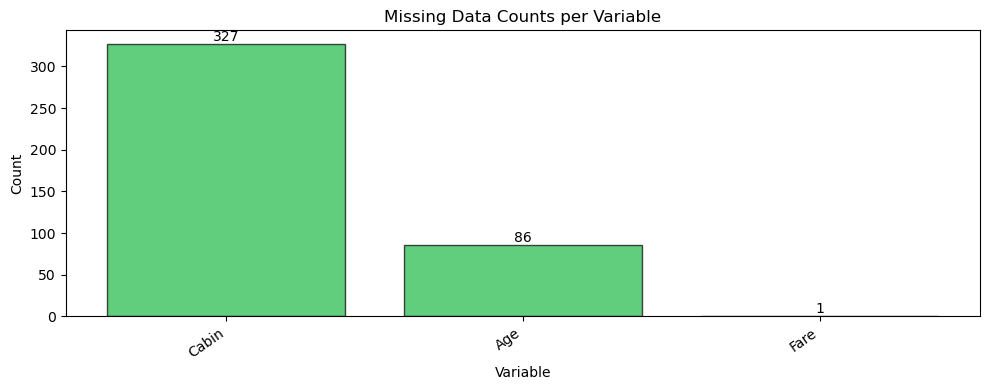

In [11]:
eda_helper_functions.plot_missing_info(temp)

## 5. High-level analysis of Outliers

In [12]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [13]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 6. Pair Plots

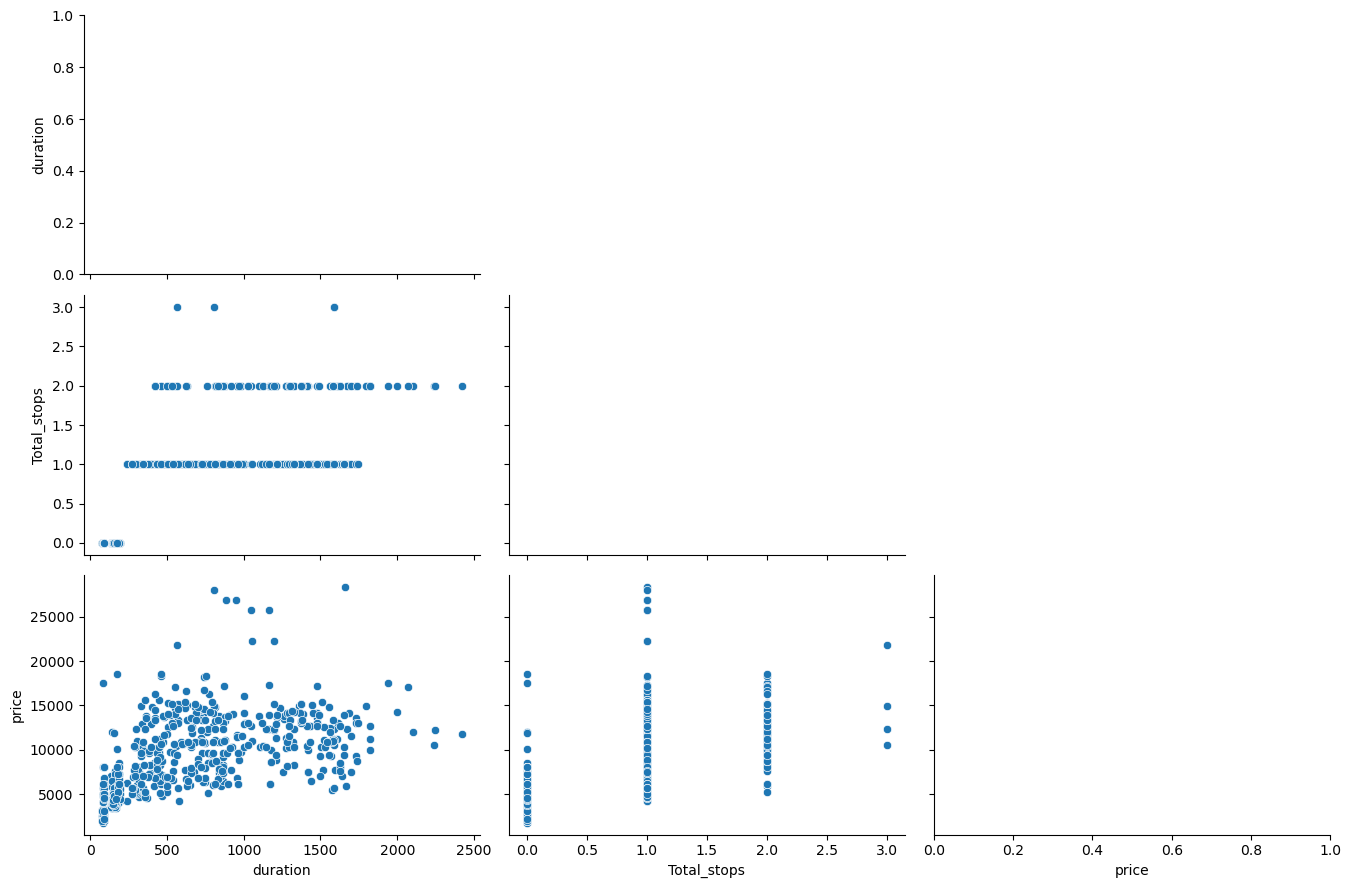

In [14]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


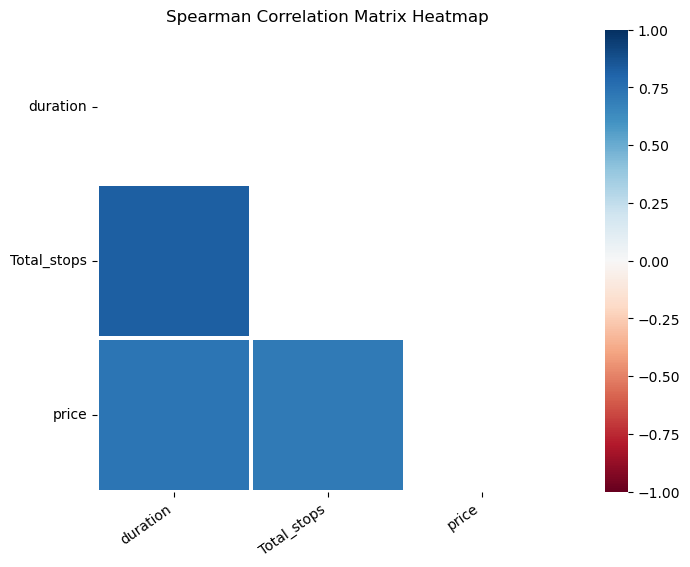

In [16]:
eda_helper_functions.correlation_heatmap(train)

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


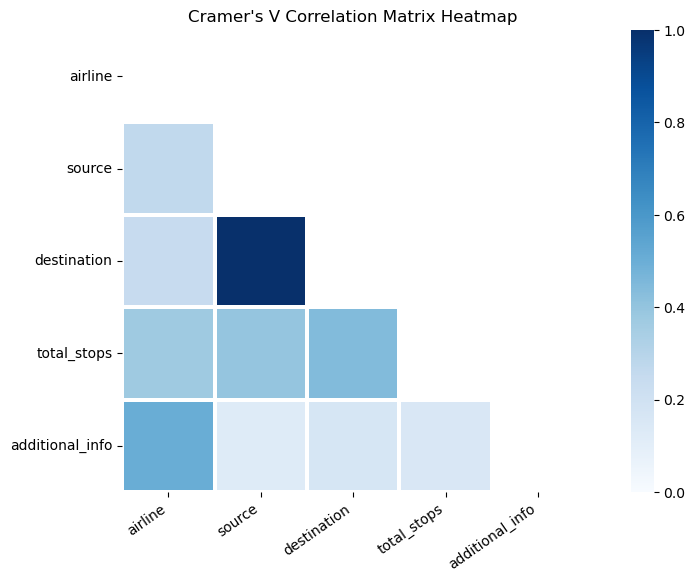

In [17]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [15]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info',
       'Total_stops', 'price'],
      dtype='object')

### 8.1 airline

In [16]:
train.airline

0           Indigo
1          Vistara
2          Vistara
3           Indigo
4      Jet Airways
          ...     
635    Jet Airways
636      Air India
637    Jet Airways
638         Indigo
639    Jet Airways
Name: airline, Length: 640, dtype: object

In [17]:
eda_helper_functions.cat_summary(train, "airline")

0           Indigo
1          Vistara
2          Vistara
3           Indigo
4      Jet Airways
          ...     
635    Jet Airways
636      Air India
637    Jet Airways
638         Indigo
639    Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,225


,count,percentage
category,,
Jet Airways,225,0.351562
Indigo,121,0.189062
Air India,114,0.178125
Multiple Carriers,63,0.098437
Spicejet,48,0.075000
Vistara,31,0.048438
Air Asia,23,0.035937
Goair,15,0.023438


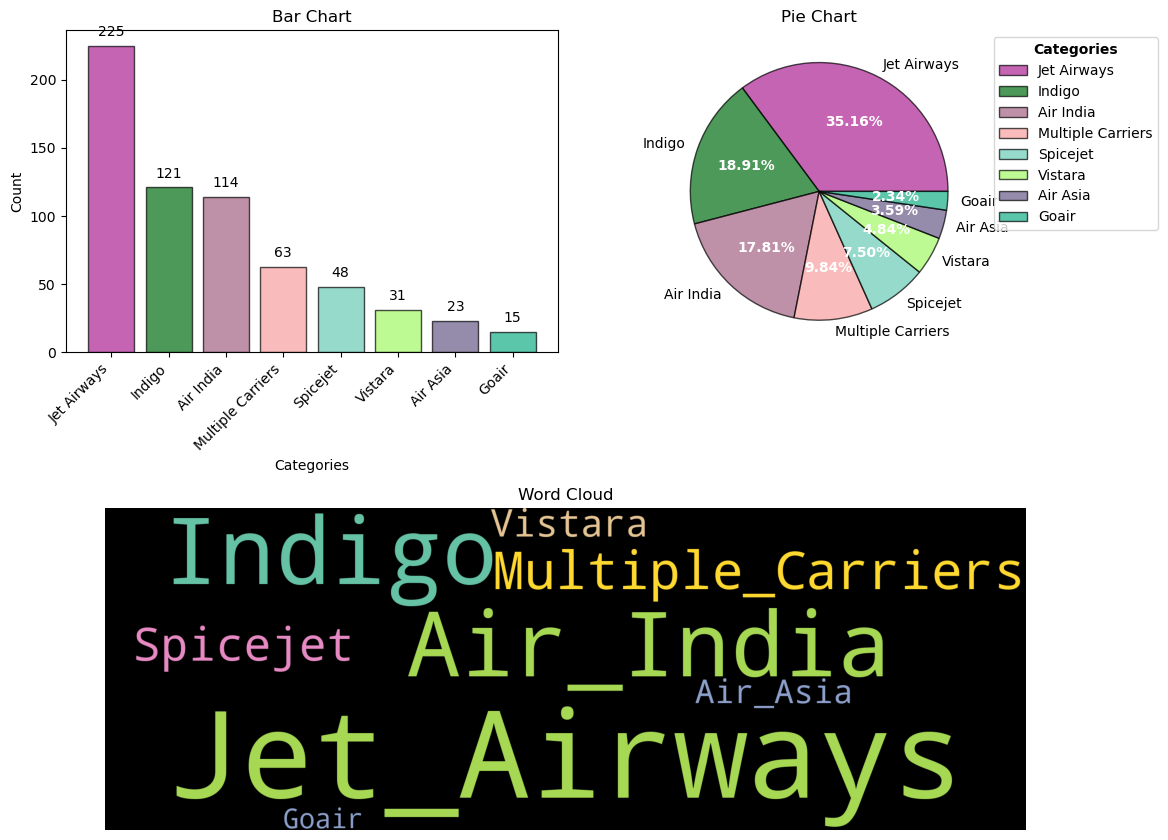

In [18]:
eda_helper_functions.cat_univar_plots(train, "airline")

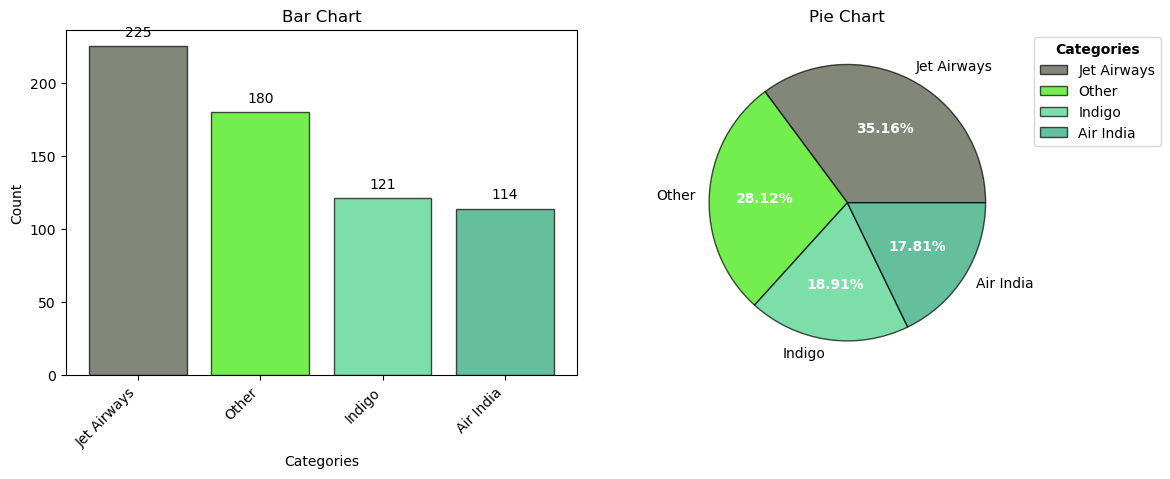

In [19]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

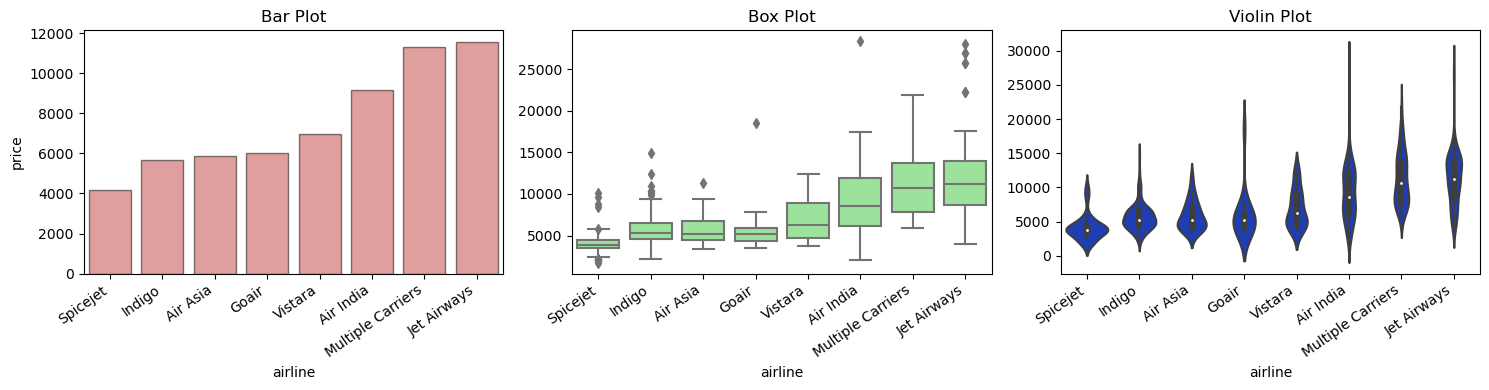

In [20]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [21]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 57.00574891352818
- p-value              : 3.4667382554838126e-63
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 293.7583943964224
- p-value              : 1.3013795302630074e-59
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


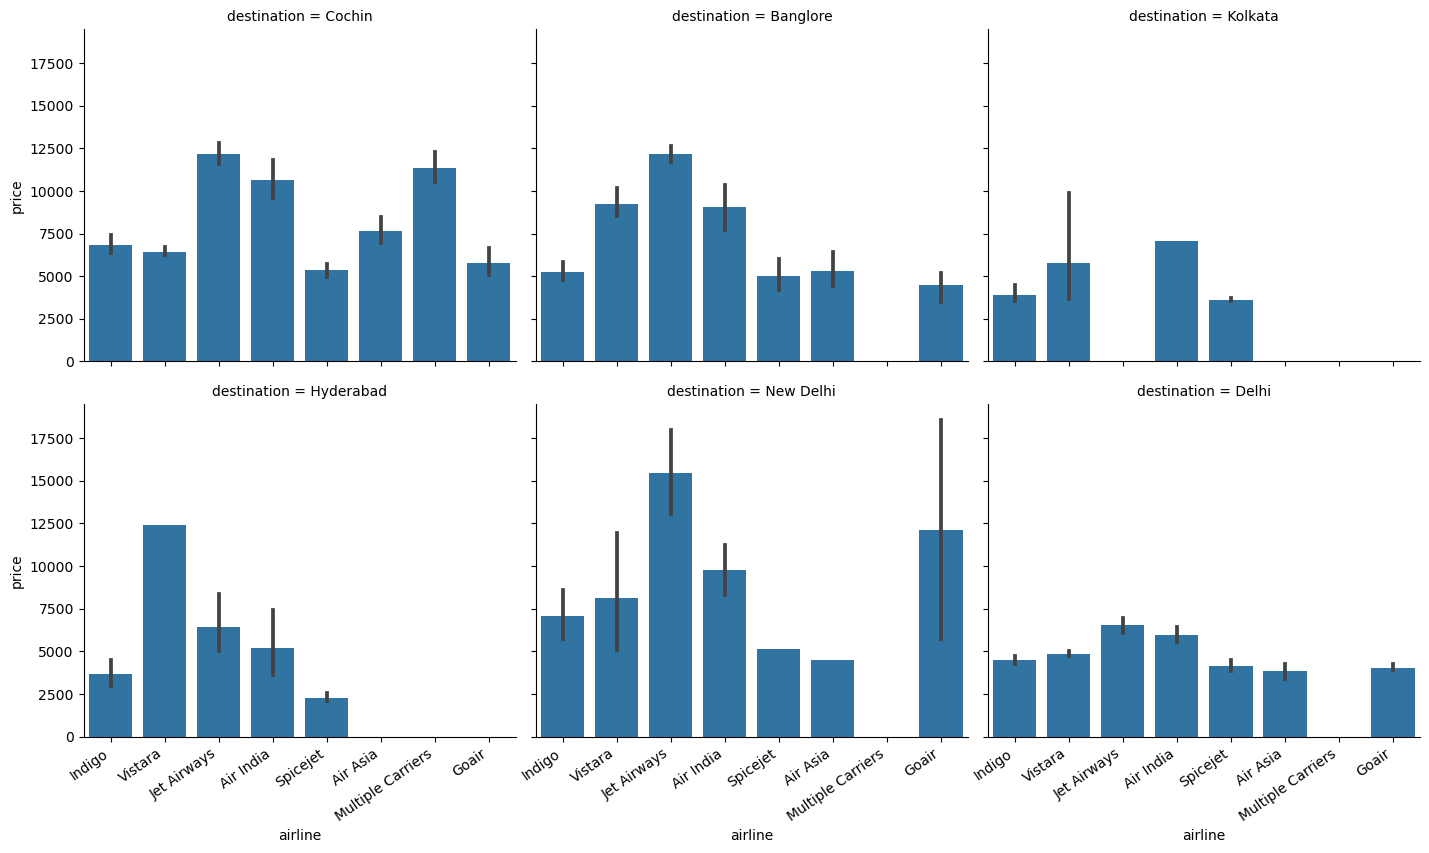

In [22]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [38]:
train.date_of_journey

0     2019-05-09
1     2019-04-01
2     2019-05-21
3     2019-03-21
4     2019-05-18
         ...    
635   2019-03-03
636   2019-03-21
637   2019-06-06
638   2019-03-03
639   2019-03-01
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

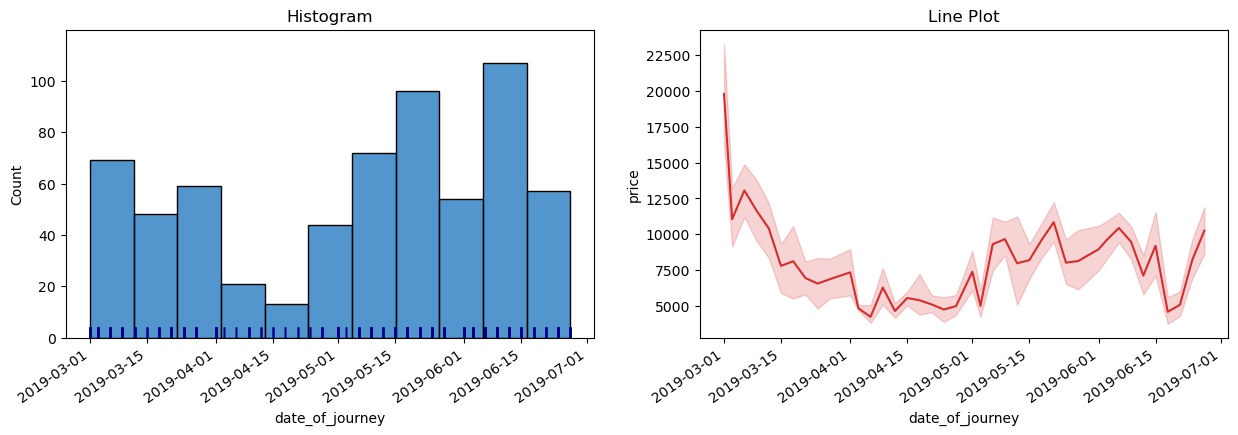

In [23]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

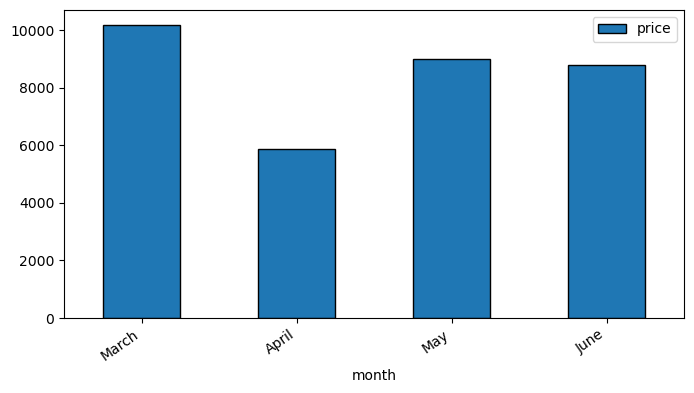

In [24]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

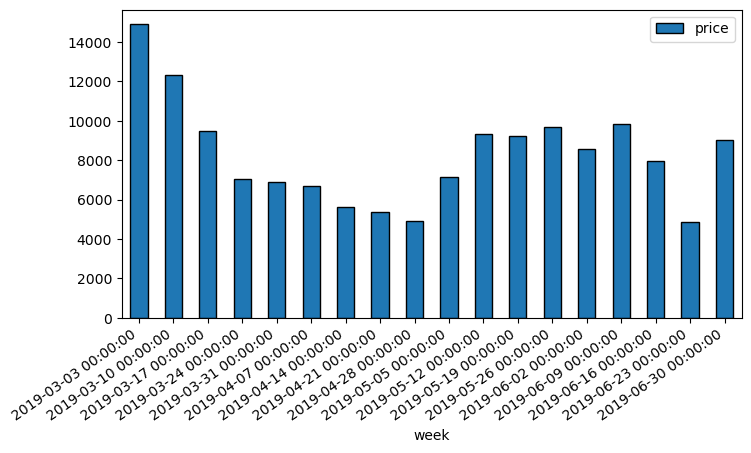

In [25]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

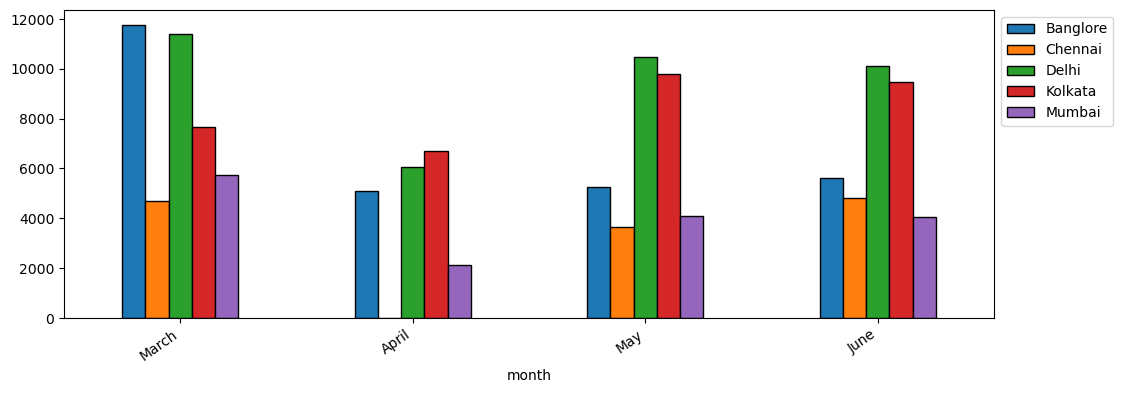

In [26]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [27]:
train.dep_time

0     2024-05-28 18:35:00
1     2024-05-28 20:20:00
2     2024-05-28 20:20:00
3     2024-05-28 07:55:00
4     2024-05-28 20:00:00
              ...        
635   2024-05-28 18:15:00
636   2024-05-28 20:30:00
637   2024-05-28 11:10:00
638   2024-05-28 02:30:00
639   2024-05-28 14:05:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

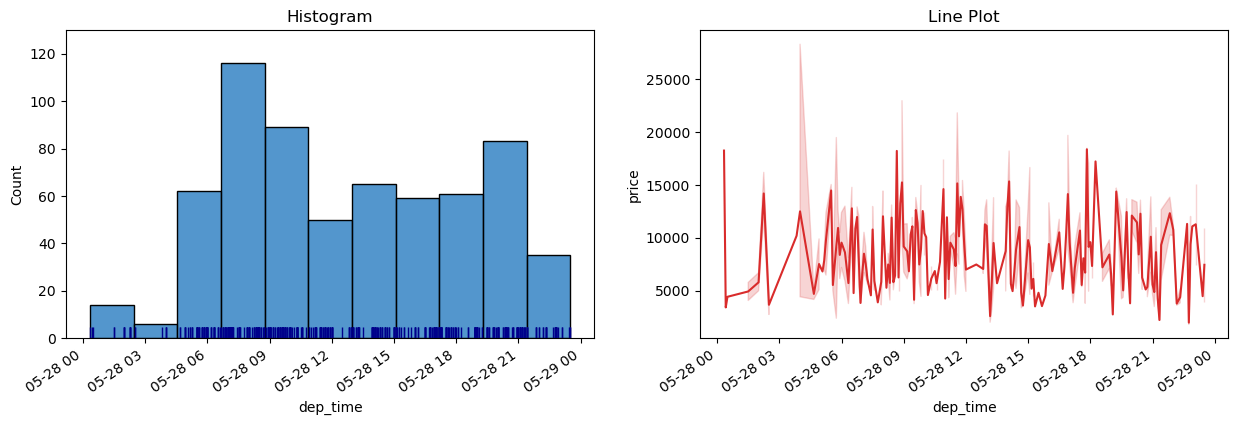

In [28]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

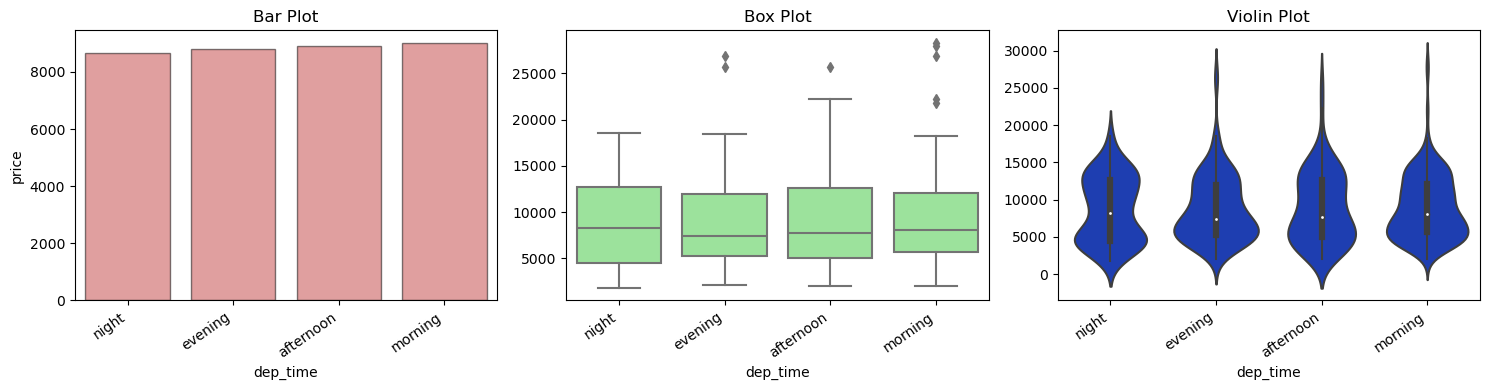

In [29]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [32]:
train.duration

0       415
1      1595
2       865
3       140
4       735
       ... 
635    1475
636    1590
637     175
638      90
639    1165
Name: duration, Length: 640, dtype: int64

In [33]:
eda_helper_functions.num_summary(train, "duration")

0       415
1      1595
2       865
3       140
4       735
       ... 
635    1475
636    1590
637     175
638      90
639    1165
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,140.00
25,170.00
50,490.00
75,935.00
90,1480.00
95,1610.25
99,1893.20


,value
mean,642.578125
trimmed mean (5%),609.696181
trimmed mean (10%),582.138672
median,490.000000


,value
var,264594.907815
std,514.387896
IQR,765.000000
mad,327.500000
coef_variance,0.800506


,value
skewness,0.833114
kurtosis,-0.293848


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.082401714870411e-21
Test Statistic       : 0.8868088126182556
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 24.347970101696774
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [34]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    490.0
0.75    935.0
Name: duration, dtype: float64

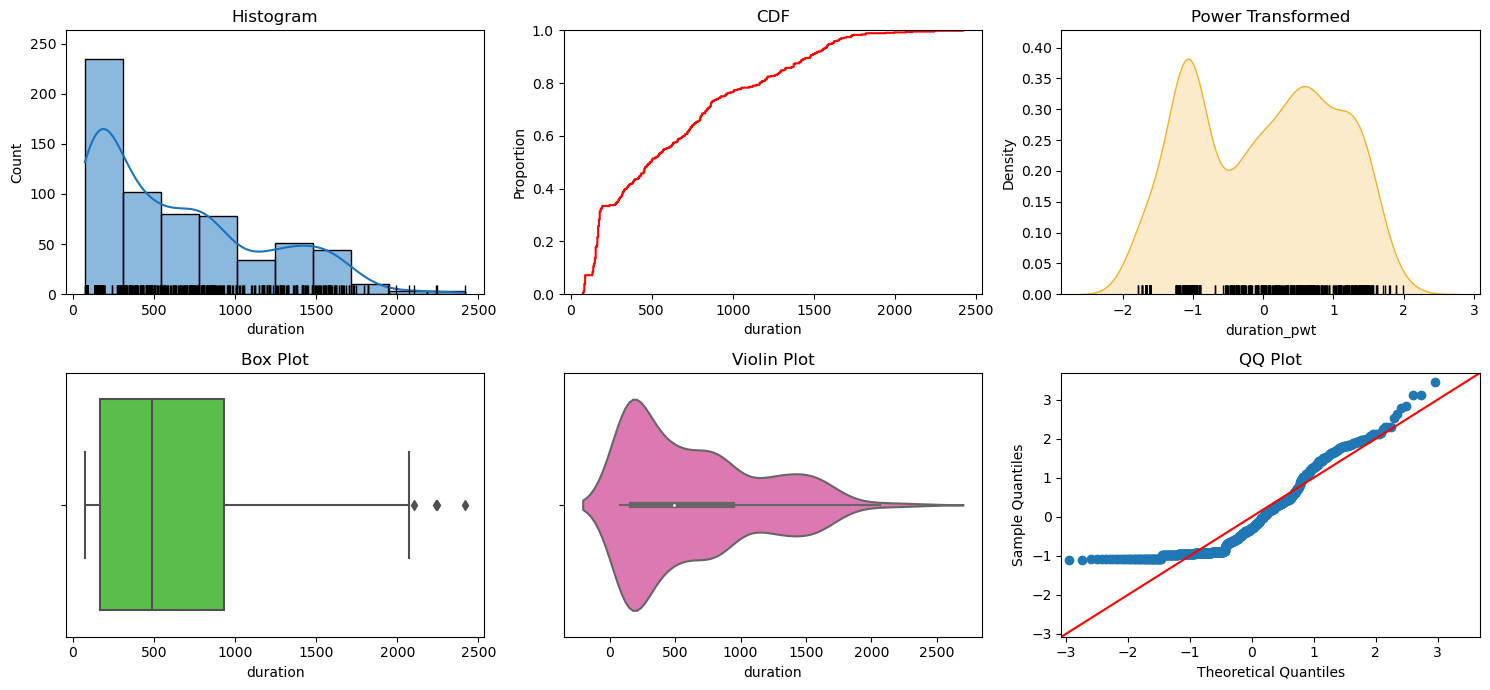

In [35]:
eda_helper_functions.num_univar_plots(train, "duration")

TypeError: Got both 'edgecolor' and 'edgecolors', which are aliases of one another

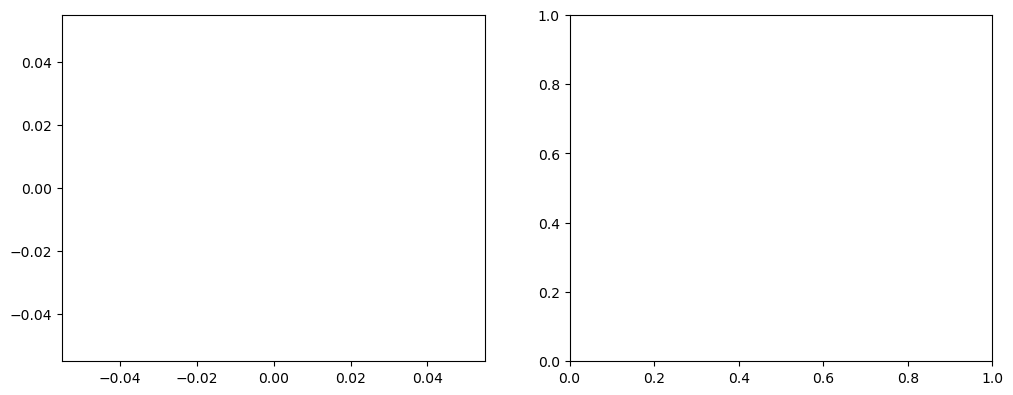

In [39]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=30,
		cmap="Blues"
	)
)

In [40]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5863116067894242
- p-value              : 2.358693218213159e-60
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7335367622988253
- p-value              : 4.278591025494372e-109
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


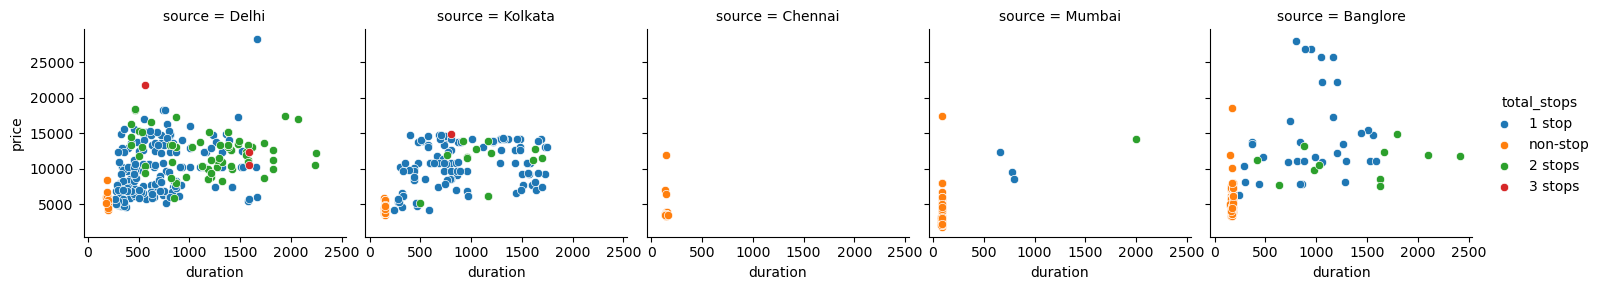

In [41]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

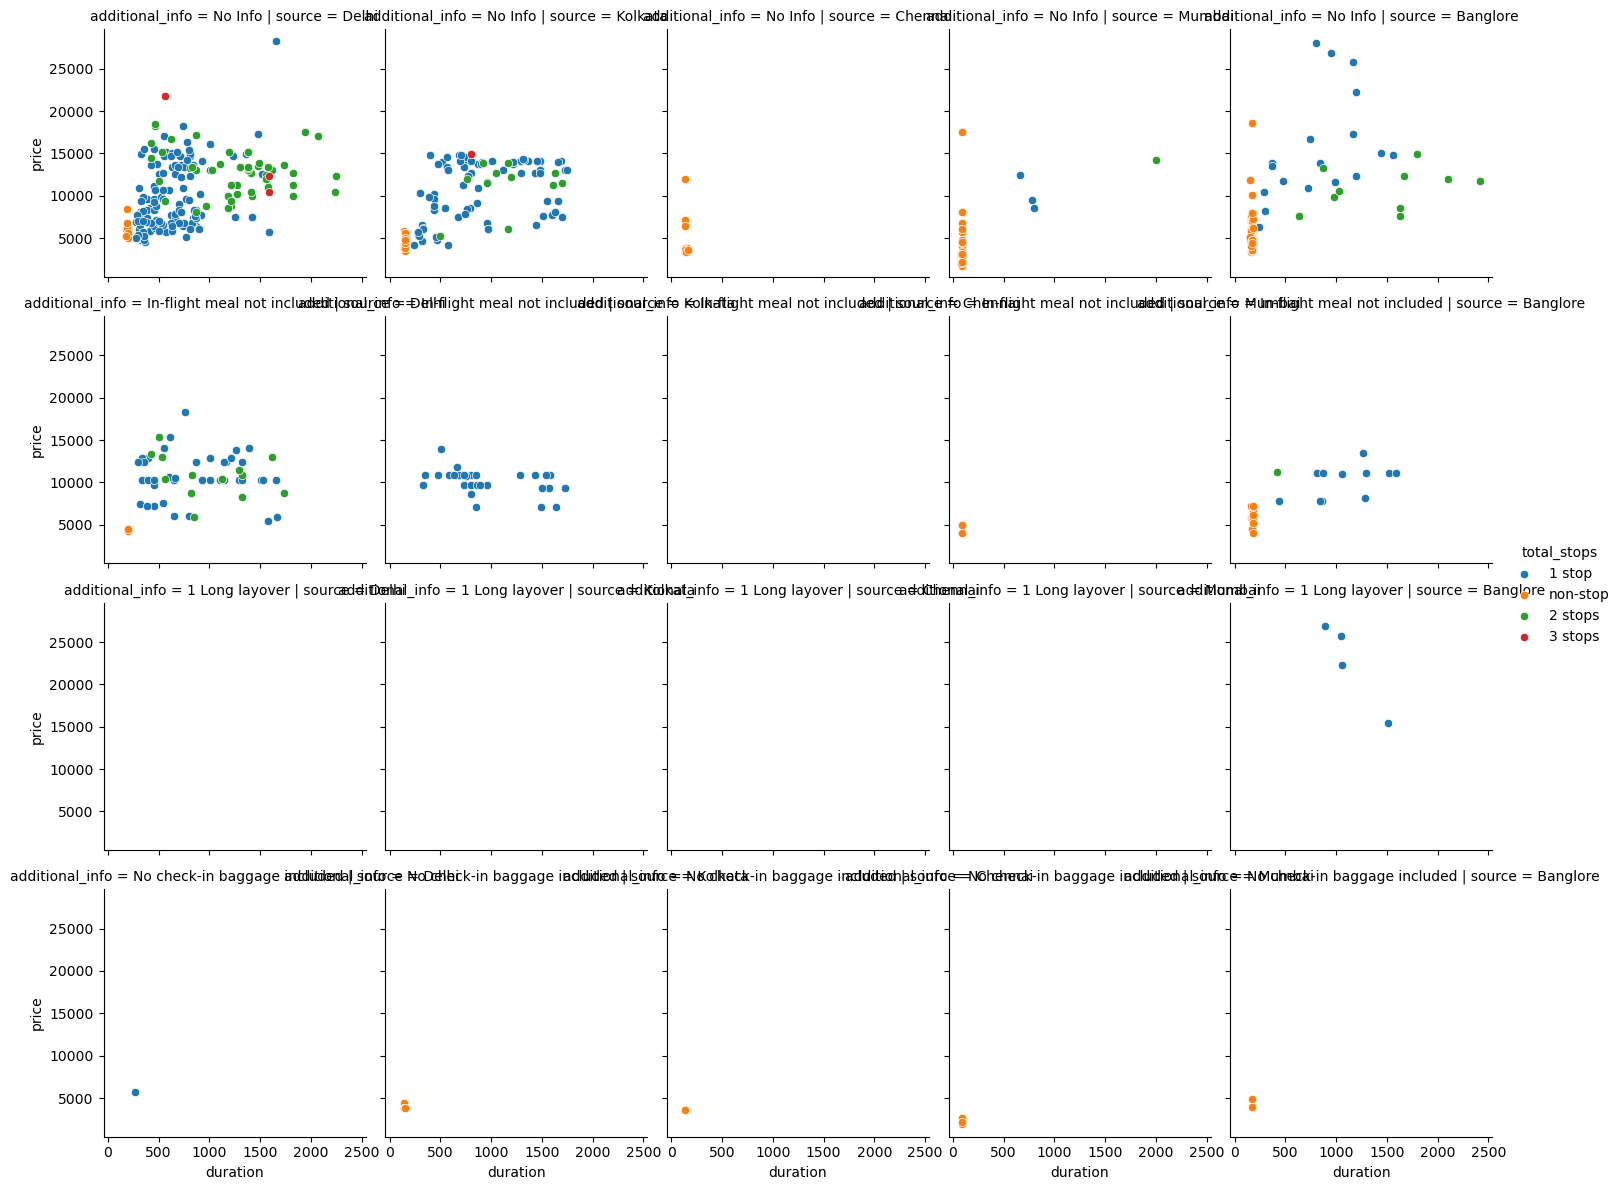

In [42]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [43]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -977.5
Upper Limit : 2082.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,Total_stops,price
109,Air India,2019-03-03,Banglore,New Delhi,2024-05-28 11:05:00,2024-05-28 22:10:00,2105,2 stops,No Info,2.0,11948
54,Air India,2019-05-21,Delhi,Cochin,2024-05-28 05:55:00,2024-05-28 19:15:00,2240,2 stops,No Info,2.0,10493
425,Jet Airways,2019-03-27,Delhi,Cochin,2024-05-28 06:20:00,2024-05-28 19:45:00,2245,2 stops,No Info,2.0,12273
464,Air India,2019-03-03,Banglore,New Delhi,2024-05-28 05:50:00,2024-05-28 22:10:00,2420,2 stops,No Info,2.0,11791


### 8.5 additional_info

In [41]:
eda_helper_functions.cat_summary(train, "additional_info")

0      In-flight meal not included
1                          No Info
2                          No Info
3                          No Info
4                          No Info
                  ...             
635                        No Info
636                        No Info
637                        No Info
638                        No Info
639    In-flight meal not included
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,488


,count,percentage
category,,
No Info,488,0.762500
In-flight meal not included,136,0.212500
No check-in baggage included,15,0.023438
1 Long layover,1,0.001563


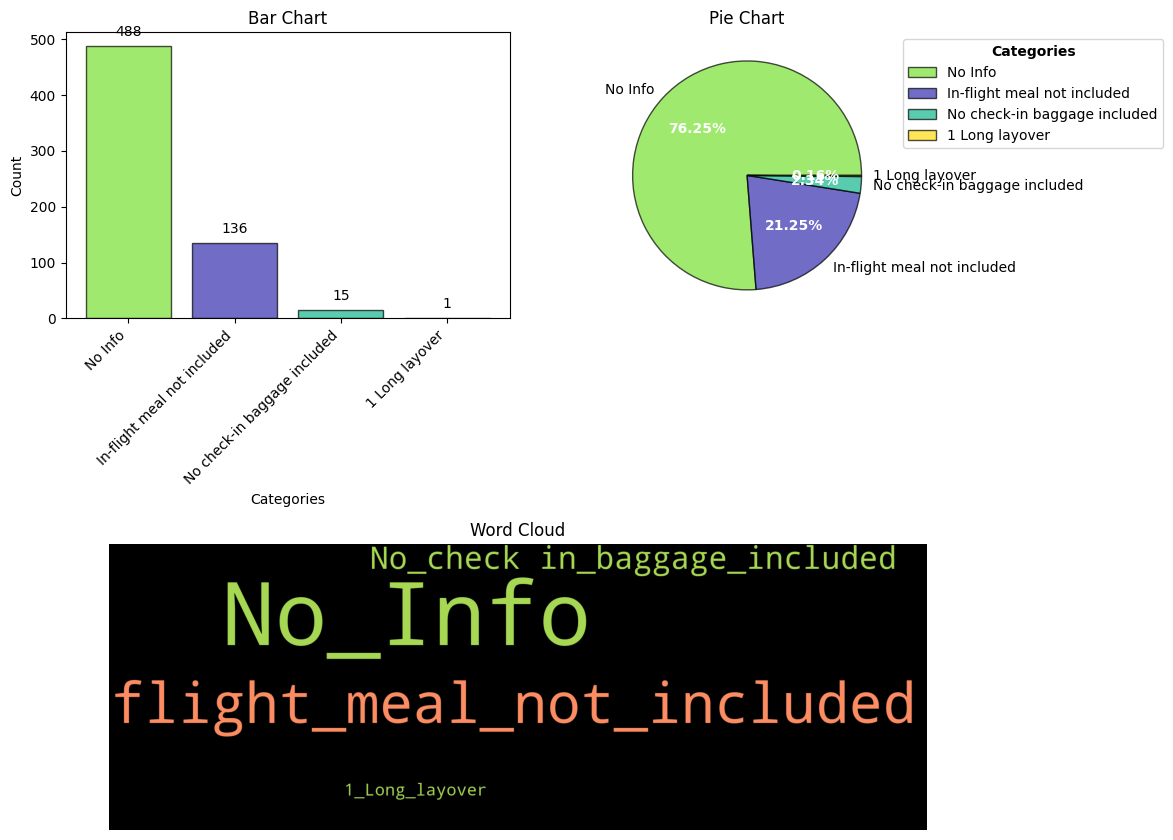

In [42]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

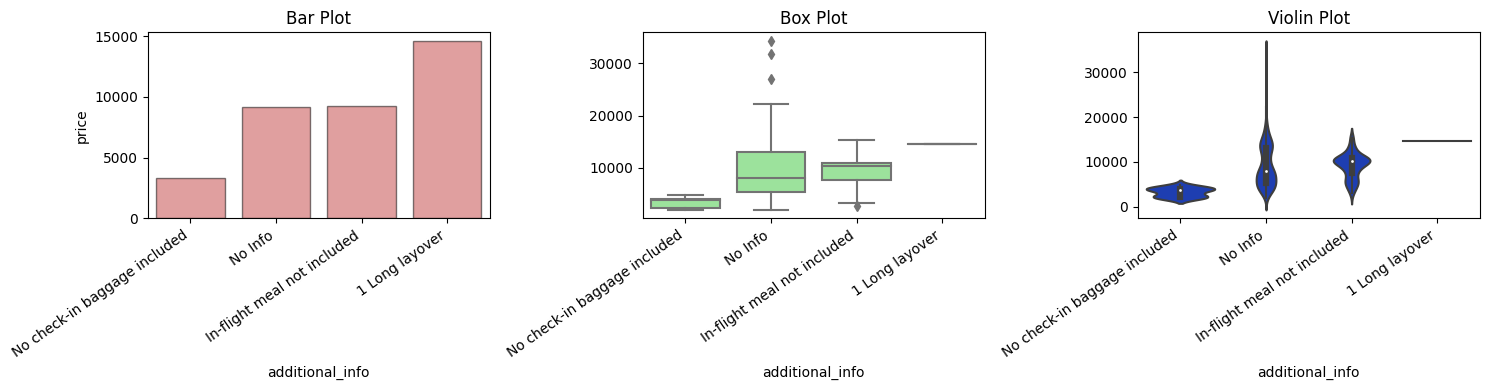

In [43]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

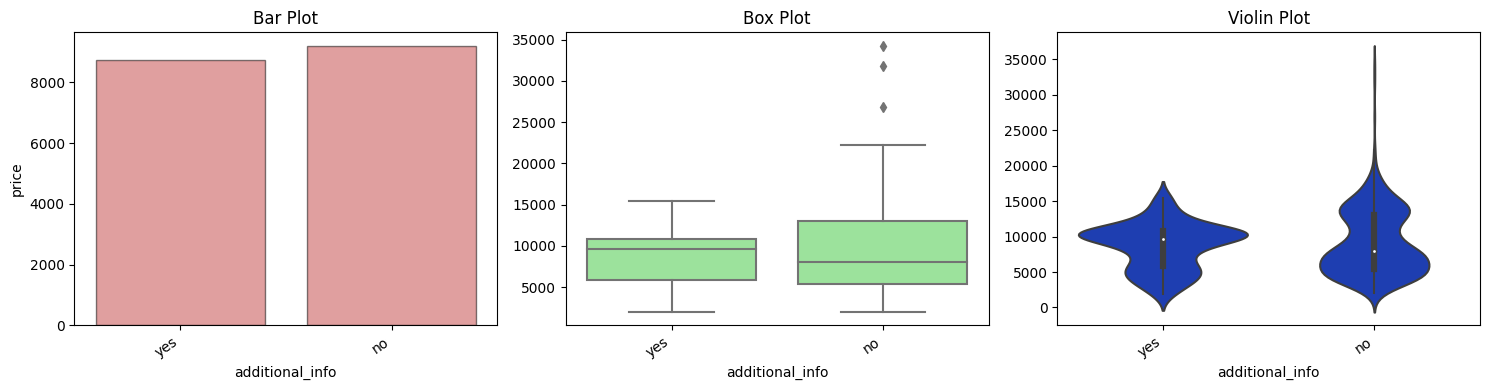

In [44]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

- `additional_info` has severely rare categories
- Converted it into a binary feature for further analysis

## 9. Automated EDA

In [45]:
# from ydata_profiling import ProfileReport

In [46]:
# report = ProfileReport(train)

In [47]:
# report.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]